# World Happiness Report 2023

In [208]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import plotly.graph_objects as go
%matplotlib inline
import seaborn as sns

In [209]:
df=pd.read_excel('Happiness.xlsx')
df.head()

,Rank,Country name,Avg_life_Eval,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,1,Finland,7.804,1.888,1.585,0.535,0.772,0.126,0.535,2.363
1,2,Denmark,7.586,1.949,1.548,0.537,0.734,0.208,0.525,2.084
2,3,Iceland,7.530,1.926,1.620,0.559,0.738,0.250,0.187,2.250
3,4,Israel,7.473,1.833,1.521,0.577,0.569,0.124,0.158,2.691
4,5,Netherlands,7.403,1.942,1.488,0.545,0.672,0.251,0.394,2.110


In [210]:
df.shape

(137, 10)

In [211]:
df.dtypes

Rank                              int64
Country name                     object
Avg_life_Eval                   float64
 GDP per capita                 float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object

In [212]:
df.rename({' GDP per capita':'GDP per capita'},inplace=True,axis=1)

In [213]:
df.isnull().sum()

Rank                            0
Country name                    0
Avg_life_Eval                   0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
Dystopia + residual             0
dtype: int64

In [214]:
df.iloc[:,2:].describe()

,Avg_life_Eval,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000
mean,5.539796,1.406985,1.156212,0.365635,0.540000,0.148474,0.145898,1.776642
std,1.139929,0.432963,0.326322,0.156243,0.149501,0.076053,0.126723,0.502727
min,1.859000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.110000
25%,4.724000,1.099000,0.962000,0.250000,0.455000,0.097000,0.060000,1.556000
50%,5.684000,1.449000,1.227000,0.389000,0.557000,0.137000,0.111000,1.845000
75%,6.334000,1.798000,1.401000,0.486000,0.656000,0.199000,0.187000,2.078000
max,7.804000,2.200000,1.620000,0.702000,0.772000,0.422000,0.561000,2.955000


### Finding Outliers using Boxplot

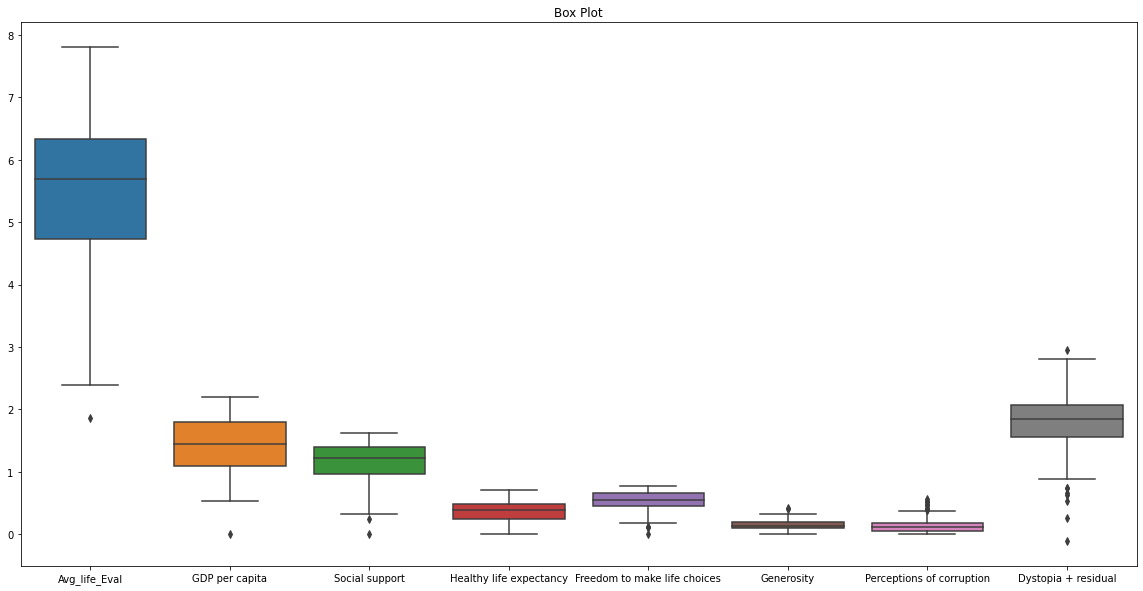

In [215]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df[['Avg_life_Eval', 'GDP per capita', 'Social support', 'Healthy life expectancy', 
                     'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 
                     'Dystopia + residual']])
plt.title('Box Plot')
plt.show()

#### where in Avg_life_Eval,GDP per capita have one outlier each.Social support and Freedom to make choices have two outlier each.Dystopia + residual have 5 outliers.

### Distribution of data for all numerical attributes

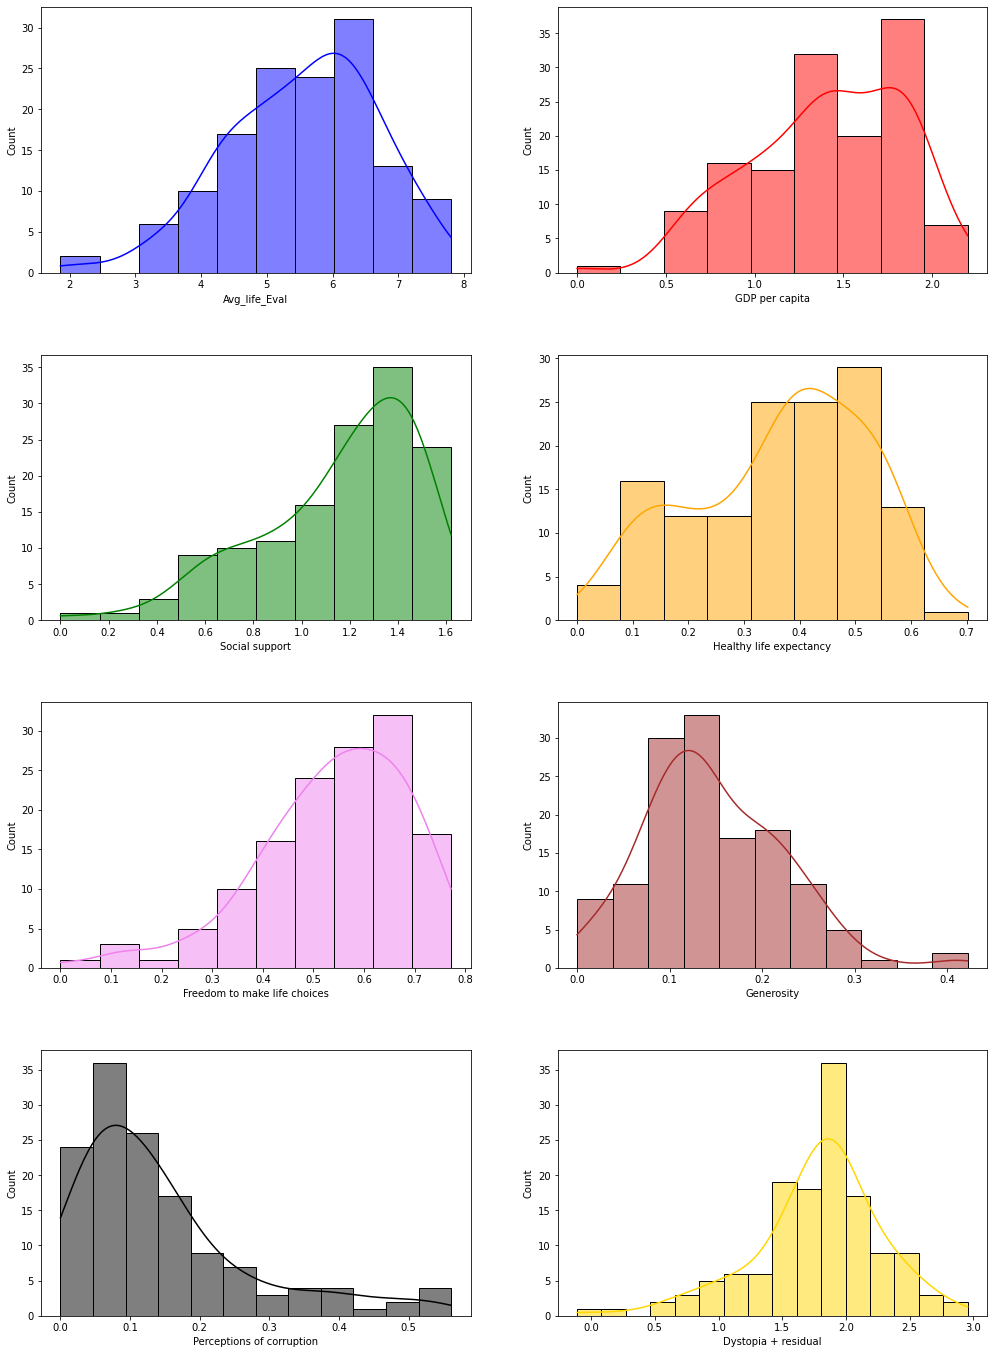

In [112]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Create subplots
fig = plt.figure(figsize=(15, 20))

# Create histograms using seaborn
plt.subplot(4, 2, 1)
sns.histplot(data=df, x='Avg_life_Eval', color='blue',kde=True)
plt.ylabel('Count')

plt.subplot(4, 2, 2)
sns.histplot(data=df, x='GDP per capita', color='red',kde=True)
plt.ylabel('Count')

plt.subplot(4, 2, 3)
sns.histplot(data=df, x='Social support', color='green',kde=True)
plt.ylabel('Count')

plt.subplot(4, 2, 4)
sns.histplot(data=df, x='Healthy life expectancy', color='orange',kde=True)
plt.ylabel('Count')

plt.subplot(4, 2, 5)
sns.histplot(data=df, x='Freedom to make life choices', color='violet',kde=True)
plt.ylabel('Count')

plt.subplot(4, 2, 6)
sns.histplot(data=df, x='Generosity', color='brown',kde=True)
plt.ylabel('Count')

plt.subplot(4, 2, 7)
sns.histplot(data=df, x='Perceptions of corruption', color='black',kde=True)
plt.ylabel('Count')

plt.subplot(4, 2, 8)
sns.histplot(data=df, x='Dystopia + residual', color='gold',kde=True)
plt.ylabel('Count')

# Adjust spacing between subplots
fig.tight_layout(pad=5.0)

# Show the plots
plt.show()


#### Avg_life_Eval and GDP per capita are some what uniformly distributed.Where Social support is slightly negatively skewed and Healthy life expectancy is some what uniformly distributed.Where Freedom to make choices in life is negatively skewed and Generosity,Pereceptions of corruption is positively skewed and Dystopia + residual is normally distributed.

### Correlation between all numerical attributes

In [97]:
corr_mat=df.iloc[:,2:].corr()
corr_mat

,Avg_life_Eval,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
Avg_life_Eval,1.000000,0.784342,0.834604,0.747170,0.662909,0.043680,0.471913,0.495025
GDP per capita,0.784342,1.000000,0.737993,0.837805,0.451405,-0.156780,0.436979,-0.043009
Social support,0.834604,0.737993,1.000000,0.722514,0.541832,0.035736,0.272538,0.147618
Healthy life expectancy,0.747170,0.837805,0.722514,1.000000,0.416462,-0.130974,0.405678,-0.013581
Freedom to make life choices,0.662909,0.451405,0.541832,0.416462,1.000000,0.169685,0.383672,0.213118
Generosity,0.043680,-0.156780,0.035736,-0.130974,0.169685,1.000000,0.121712,0.019134
Perceptions of corruption,0.471913,0.436979,0.272538,0.405678,0.383672,0.121712,1.000000,0.006047
Dystopia + residual,0.495025,-0.043009,0.147618,-0.013581,0.213118,0.019134,0.006047,1.000000


#### GDP per capita and healthy life expectancy are strongly correlated. This suggests that economic prosperity is an important factor in happiness.
#### Social support and freedom to make life choices are strongly correlated. This suggests that having strong social ties and being able to make your own decisions are important for happiness.
#### Perceptions of corruption and generosity are negatively correlated. This suggests that corruption can have a negative impact on happiness, while generosity can have a positive impact.

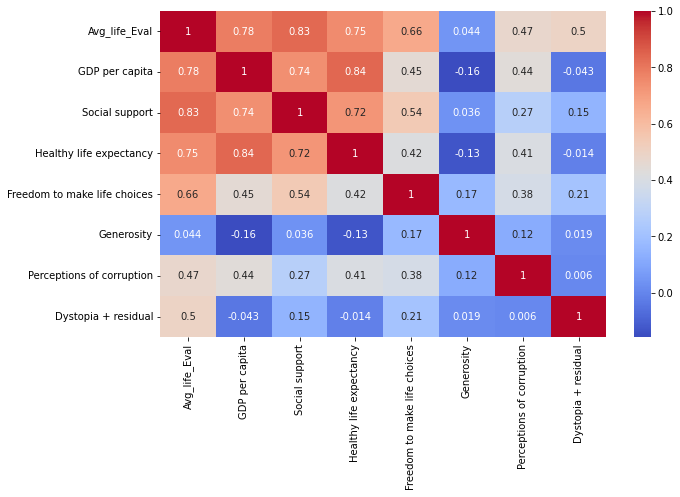

In [114]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')
plt.show()


## Hypothesis testing

### Is there any significant relationship between Average Life Evaluation and Healthy life Expectancy?

In [127]:
Ho='There is no relationship between Average Life Evaluation and Healthy Life Expectancy'
Ha='There is a relationship between Average Life Evaluation and Healthy Life Expectancy'
statistic,pvalue=stats.ttest_ind(df['Avg_life_Eval'],df['Healthy life expectancy'])
if pvalue<=0.5:
    print(f"{Ha} becaz (p_vlue){pvalue:.3f}<=0.5")
else:
    print(f"{Ho} becaz (pvalue){pvalue:.3f}>0.5")

There is a relationship between Average Life Evaluation and Healthy Life Expectancy becaz (p_vlue)0.000<=0.5


### Is there any significant relationship between Average Life Evaluation and Freedom to make life choices?

In [131]:
Ho='There is no relationship between Average Life Evaluation and Freedom to make life choices'
Ha='There is a relationship between Average Life Evaluation and Freedom to make life choices'
statistic,pvalue=stats.ttest_ind(df['Avg_life_Eval'],df['Freedom to make life choices'])
if pvalue<=0.5:
    print(f"{Ha} becaz (p_vlue){pvalue:.3f}<=0.5")
else:
    print(f"{Ho} becaz (pvalue){pvalue:.3f}>0.5")

There is a relationship between Average Life Evaluation and Freedom to make life choices becaz (p_vlue)0.000<=0.5


### Is there any significant relationship between Average Life Evaluation and GDP per capita?

In [132]:
Ho='There is no relationship between Average Life Evaluation and GDP per capita'
Ha='There is a relationship between Average Life Evaluation and GDP per capita'
statistic,pvalue=stats.ttest_ind(df['Avg_life_Eval'],df['GDP per capita'])
if pvalue<=0.5:
    print(f"{Ha} becaz (p_vlue){pvalue:.3f}<=0.5")
else:
    print(f"{Ho} becaz (pvalue){pvalue:.3f}>0.5")

There is a relationship between Average Life Evaluation and GDP per capita becaz (p_vlue)0.000<=0.5


### Is there any significant relationship between Average Life Evaluation and Percepstions of corruption ?

In [143]:
Ho='There is no relationship between Average Life Evaluation and Perceptions of Corruptions '
Ha='There is a relationship between Average Life Evaluation and Perceptions of Corruptions'
statistic,pvalue=stats.ttest_ind(df['Avg_life_Eval'],df['Perceptions of corruption'])
if pvalue<=0.5:
    print(f"{Ha} becaz (p_vlue){pvalue:.3f}<=0.5")
else:
    print(f"{Ho} becaz (pvalue){pvalue:.3f}>0.5")

There is a relationship between Average Life Evaluation and Perceptions of Corruptions becaz (p_vlue)0.000<=0.5


### Is there any significant relationship between Average Life Evaluation and Other attributes ?

In [144]:
Ho='There is no relationship between Average Life Evaluation and Generosity and Social support and Dystopia + residual'
Ha='There is a relationship between Average Life Evaluation and Generosity and Social support and Dystopia + residual'

statistic,pvalue=stats.f_oneway(df['Avg_life_Eval'],df['Generosity'],df['Social support'],df['Dystopia + residual'])
if pvalue<=0.5:
    print(f"{Ha} becaz (p_vlue){pvalue:.3f}<=0.5")
else:
    print(f"{Ho} becaz (pvalue){pvalue:.3f}>0.5")

There is a relationship between Average Life Evaluation and Generosity and Social support and Dystopia + residual becaz (p_vlue)0.000<=0.5


### Is there any significant relationship between Healthy life expectancy and Freedom to make life choices and Generosity ?

In [147]:
Ho='There is no relationship between Healthy life expectancy and Freedom to make life choices and Generosity '
Ha='There is a relationship between Healthy life expectancy and Freedom to make life choices and Generosity '

statistic,pvalue=stats.f_oneway(df['Healthy life expectancy'],df['Freedom to make life choices'],
                                df['Generosity'])
if pvalue<=0.5:
    print(f"{Ha} becaz (p_vlue){pvalue:.3f}<=0.5")
else:
    print(f"{Ho} becaz (pvalue){pvalue:.3f}>0.5")

There is a relationship between Healthy life expectancy and Freedom to make life choices and Generosity  becaz (p_vlue)0.000<=0.5
